<a href="https://colab.research.google.com/github/aragornchunletia/Mixtape/blob/main/thornton_possible_outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [21]:
def gap():
  y1 = np.array([7,5,5,7,4,10,1,5,3,9])
  y0 = np.array([1,6,1,8,2,1,10,6,7,8])
  mat = np.array([y1, y0]).T
  np.random.shuffle( mat)
  d = np.concatenate((np.ones(5), np.zeros(5)))
  y = d*mat[:,0] + (1-d)*mat[:,1]
  sdo = np.mean(y[0:5] - y[5:])
  return sdo




In [23]:
simulation = [gap() for _ in range(10000)]

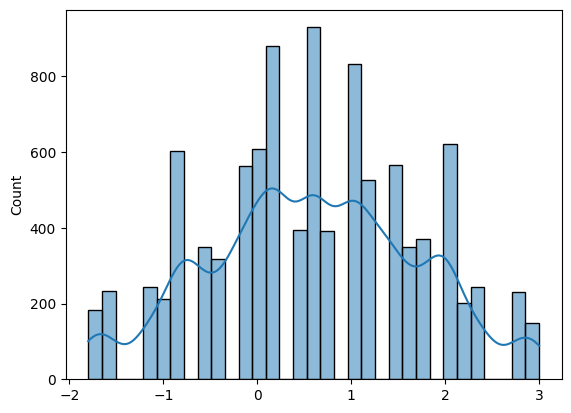

In [24]:
sns.histplot(simulation, kde = True)
plt.show()

In [25]:
simulation_mean = np.mean(simulation)
print(f"Simulation mean: {simulation_mean:.3f}")

Simulation mean: 0.591


Thornton

In [10]:
thr_data = pd.read_stata('/content/thornton_hiv.dta')

In [12]:
thr_data.shape

(4820, 133)

In [15]:
thr_data.describe()

,site,rumphi,balaka,villnum,m1out,m2out,survey2004,got,zone,distvct,...,under_havesex_fo_hiv,over_havesex_fo_hiv,hiv_havesex_fo,havesex_fo_hiv,any_havesex_fo_male,tinc_havesex_fo_male,under_havesex_fo_male,tinc_male_hadsex12,under_male_hadsex12,MainSample
count,4820.000000,4820.000000,4820.000000,4793.000000,2880.000000,2959.000000,4820.000000,2894.000000,4792.000000,4820.000000,...,1528.000000,1528.000000,1528.000000,1528.000000,1539.000000,1539.000000,1592.000000,2416.000000,2962.000000,2812.0
mean,2.014730,0.340664,0.333402,63.477571,2.505208,2.246705,0.677801,0.696614,9.771494,2.002633,...,0.016361,0.013743,0.030105,0.030105,0.224172,0.303342,0.103015,0.334443,0.148211,1.0
std,0.816393,0.473991,0.471475,48.311774,1.406569,0.813588,0.467370,0.459799,4.339750,1.256523,...,0.131960,0.121956,0.178431,0.178431,0.417169,0.687894,0.304074,0.700776,0.355373,0.0
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,0.000000,14.000000,2.000000,2.000000,0.000000,0.000000,6.000000,1.029921,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2.000000,0.000000,0.000000,57.000000,2.000000,2.000000,1.000000,1.000000,10.000000,1.674839,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,3.000000,1.000000,1.000000,111.000000,2.000000,2.000000,1.000000,1.000000,13.000000,2.742947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189120,0.000000,1.0
max,3.000000,1.000000,1.000000,145.000000,13.000000,9.000000,1.000000,1.000000,16.000000,5.191559,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.836800,1.000000,2.836800,1.000000,1.0


In [52]:
def permutate_hiv(w_df, random = True):
  df = w_df.copy()
  if random:
    df = df.sample(frac = 1).reset_index(drop = True)

  df['any'] = 0
  df.loc[:int(np.ceil(len(df) / 2)) - 1, "any"] = 1

  te1 = df.loc[df['any'] == 1,'got'].mean()
  te0 = df.loc[df['any'] == 0,'got'].mean()
  ate = te1 - te0
  return ate

In [53]:
iter = 1000
first =np.array([permutate_hiv(thr_data, random = False)])
res = np.array([permutate_hiv(thr_data) for _ in range(iter-1)])
iter_samples = [np.sort(np.concatenate((first, res[:n-1]))) for n in [100, 500, 1000]]


In [49]:

p_values = [(n,(iter_sample >= first[0]).mean().item()) for n,iter_sample in zip([100,500,1000],iter_samples)]

In [50]:
print(p_values)

[(100, 0.01), (500, 0.002), (1000, 0.001)]


In [51]:
print(np.round(first[0],3))

0.083
